# Tasa de aprendizaje (*Learning Rate*)

### Importaciones

In [ ]:
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

### Lectura de la información

#### Montar Google Drive

In [ ]:
# Versión para Google Colab
from google.colab import drive  # montar Google Drive
drive.mount('/content/gdrive')
DIRECTORIO = '/content/gdrive/MyDrive/CursoDL/datasets/' #  directorio de trabajo

# Versión para Windows
# DIRECTORIO = 'c:/temp/'

#### Lectura de los datos
Dataset '*blobs.csv*': las dos primeras columnas son las coordenadas y la tercera, el objetivo, con valores 0, 1 y 2



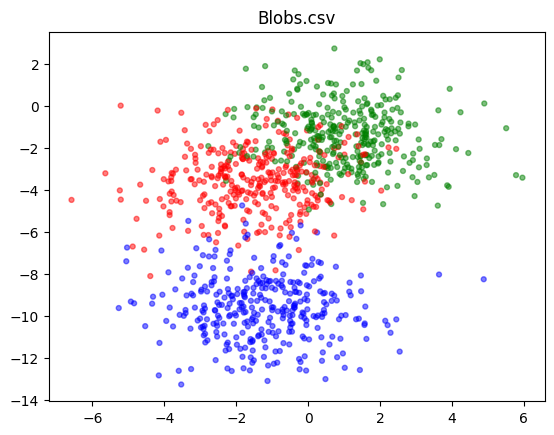

In [ ]:
X = np.loadtxt(DIRECTORIO + 'blobs.csv', delimiter=',')
colores=['blue', 'green', 'red']
cmap = matplotlib.colors.ListedColormap(colores)
plt.figure()
plt.title('Blobs.csv')
plt.scatter(X[:,0], X[:,1], c=X[:,2],marker= '.', s=50, cmap=cmap, alpha = 0.5 )
plt.show()

### Preparación de los datos

In [ ]:
# X: coordenadas (x, y) de 1000 puntos;
# y: conjunto al que pertenece el punto (0, 1 ó 2)

# si se quiere aleatorizar el orden de los puntos en el array (shuffle de filas):
np.random.shuffle(X)

y = X[:,2].astype(int) # copia la última columna en un array como entero
X = np.delete(X,2,1)   # obj=2 -> índice columna a eliminar, axis=1 -> columnas
y = to_categorical(y)  # codificación one-hot: una columna para cada valor posible del objetivo

n_entr = 500 # n_entr: número de muestras para entrenamiento

entr_X, val_X = X[:n_entr,:], X[n_entr:,:]
entr_y, val_y = y[:n_entr],   y[n_entr:]

print(y[0:5,:])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


### Función para crear el modelo, compilarlo, entrenarlo y mostrar resultado

In [ ]:
def ejecuta_modelo( entr_X,entr_y, val_X, val_y, tasa_apr):
  # define el modelo
  modelo = Sequential()
  modelo.add(Input(shape=(2,)))
  modelo.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
  modelo.add(Dense(3, activation='softmax'))

  # compila el modelo
  opt = SGD(learning_rate=tasa_apr)  # variable que contiene el optimizador a usar
  modelo.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  # entrena el modelo
  historia = modelo.fit(entr_X, entr_y, validation_data=(val_X, val_y), epochs=200, verbose=0)
  return historia

### Bucle de ejecución para cada tasa de aprendizaje a probar

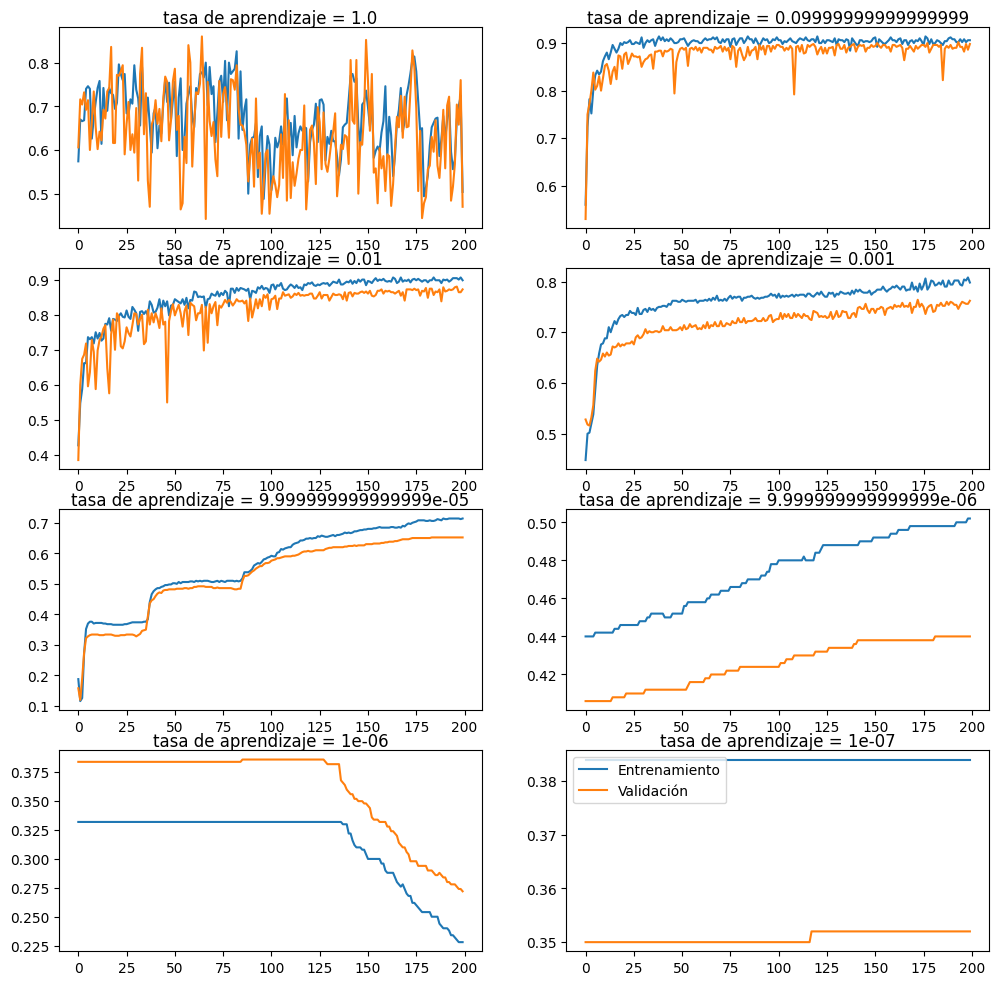

In [ ]:
plt.figure(figsize=(12,12))
lista_tasas_apr = 10.0**np.arange(0,-8,-1) # [1e-0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
for i in range(len(lista_tasas_apr)):
  plot_no = 420 + (i+1)   # determina el número de gráfica
  plt.subplot(plot_no)
  historia = ejecuta_modelo(entr_X, entr_y, val_X, val_y, lista_tasas_apr[i])

  # dibuja las curvas de aprendizaje
  plt.plot(historia.history['accuracy'],     label='entrenamiento')
  plt.plot(historia.history['val_accuracy'], label='validación')
  plt.title('tasa de aprendizaje = '+str(lista_tasas_apr[i]), pad=-50)
plt.legend(['Entrenamiento', 'Validación'], loc='upper left');
